In [1]:
pip install pandas matplotlib seaborn folium

Note: you may need to restart the kernel to use updated packages.


### rainfall data viz ###

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Optional for larger visualizations
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

### humidity data viz ###

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Optional for larger visualizations
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
# load Data
df = pd.read_csv("overall_humidity_data_2016_2020.csv")

# Convert 'day' column to datetime
df['day'] = pd.to_datetime(df['day'])


df.head() #just inspecting the basic structure

,day,station_id,station_name,latitude,longitude,aggregated_value
0,2016-11-16,S109,Ang Mo Kio Avenue 5,1.3764,103.8492,74.8
1,2016-11-16,S117,Banyan Road,1.2560,103.6790,75.8
2,2016-11-16,S50,Clementi Road,1.3337,103.7768,75.2
3,2016-11-16,S43,Kim Chuan Road,1.3399,103.8878,75.5
4,2016-11-16,S108,Marina Gardens Drive,1.2799,103.8703,80.6


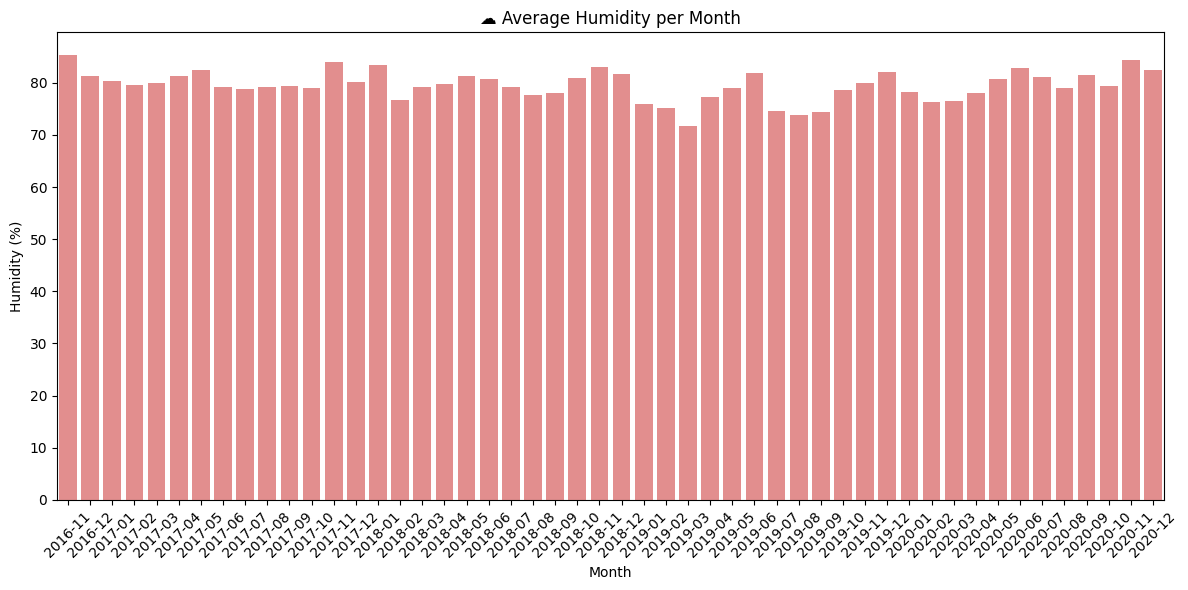

In [5]:
# bar chart for sanity check
df['month'] = df['day'].dt.to_period('M')
monthly_avg_humidity = df.groupby('month')['aggregated_value'].mean().reset_index()
monthly_avg_humidity['month'] = monthly_avg_humidity['month'].astype(str)

# plot
sns.barplot(data=monthly_avg_humidity, x='month', y='aggregated_value', color='lightcoral')
plt.xticks(rotation=45)
plt.title('☁️ Average Humidity per Month')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.show()

In [7]:
# heatmap of avg humidity per station
avg_humidity_by_station = df.groupby(['station_id', 'station_name', 'latitude', 'longitude'])['aggregated_value'].mean().reset_index()

# base map centered on Singapore
map_humidity = folium.Map(location=[1.3521, 103.8198], zoom_start=11)

# prep heat data
heat_data = [
    [row['latitude'], row['longitude'], row['aggregated_value']]
    for _, row in avg_humidity_by_station.iterrows()
]

# add heatmap layer & save the map as HTML and show link to it
HeatMap(heat_data, radius=12).add_to(map_humidity)
map_humidity.save("singapore_humidity_heatmap_2016_2020.html")
print("✅ Humidity heatmap saved as 'singapore_humidity_heatmap_2016_2020.html'.")

✅ Humidity heatmap saved as 'singapore_humidity_heatmap_2016_2020.html'.


In [8]:
import pandas as pd

# 1. Load your spreadsheet (adjust the path as needed)
file_path = 'overall_humidity_data_2016_2020.csv'
df = pd.read_csv(file_path)

# 2. Compute summary statistics
stats = df['aggregated_value'] \
    .agg(['mean', 'max', 'min']) \
    .rename({'mean': 'Mean', 'max': 'Highest', 'min': 'Lowest'})

print("Humidity Summary Statistics:")
print(stats)

# 3. Identify the records with the highest and lowest rainfall
highest = df.loc[df['aggregated_value'].idxmax()]
lowest  = df.loc[df['aggregated_value'].idxmin()]

print("\nRecord with Highest Humidity:")
print(highest.to_frame().T)

print("\nRecord with Lowest Humidity:")
print(lowest.to_frame().T)

Humidity Summary Statistics:
Mean        79.437744
Highest    100.900000
Lowest      15.700000
Name: aggregated_value, dtype: float64

Record with Highest Humidity:
            day station_id            station_name latitude  longitude  \
282  2016-12-04       S121  Old Choa Chu Kang Road  1.37288  103.72244   

    aggregated_value  
282            100.9  

Record with Lowest Humidity:
             day station_id      station_name latitude longitude  \
9355  2018-06-07       S102  Semakau Landfill    1.189   103.768   

     aggregated_value  
9355             15.7  


In [14]:
threshold_value = 80

def count_above(df, column, threshold):
    """
    Returns the count of rows in df where df[column] > threshold.
    """
    return (df[column] > threshold).sum()

# Usage
count_50 = count_above(df, 'aggregated_value', threshold_value)

print(f"Records above {threshold_value}%: {count_50}")

def threshold_counts(df, column, threshold):
    above = (df[column] > threshold).sum()
    below = (df[column] < threshold).sum()
    total = len(df)
    return pd.DataFrame({
        'Condition': [f'>{threshold}', f'<{threshold}', 'Total'],
        'Count':     [above, below, total]
    })

# Usage:
print(threshold_counts(df, 'aggregated_value', threshold_value))

Records above 80%: 11398
  Condition  Count
0       >80  11398
1       <80  12957
2     Total  24358


In [16]:
def daily_rainfall_summary(df):
    return (
        df
        .groupby('day')['aggregated_value']
        .agg(
            Average='mean',
            Highest='max',
            Lowest='min',
            StationCount='count'
        )
        .reset_index()
    )

daily_stats = daily_rainfall_summary(df)
print(daily_stats)

             day    Average    Highest     Lowest  StationCount
0     2016-11-16  79.552941  88.800000  71.500000            17
1     2016-11-17  85.062500  96.400000  75.700000            16
2     2016-11-18  88.514286  98.600000  76.500000            14
3     2016-11-19  89.057143  95.600000  83.000000            14
4     2016-11-20  87.213333  97.900000  77.800000            15
...          ...        ...        ...        ...           ...
1483  2020-12-27  84.228055  90.705777  77.075039            14
1484  2020-12-28  81.026826  89.462863  73.103125            15
1485  2020-12-29  85.336187  92.720307  81.038912            15
1486  2020-12-30  79.792436  87.352477  75.780336            15
1487  2020-12-31  81.953909  89.335908  75.975574            15

[1488 rows x 5 columns]


In [20]:
# 1. Make sure 'day' is datetime
df['day'] = pd.to_datetime(df['day'])

# 2. Filter for January 2017
mask = (df['day'].dt.year == 2017) & (df['day'].dt.month == 1)
jan17 = df[mask]

# 3a. Simple overall average (across all station‐date records)
avg_humidity = jan17['aggregated_value'].mean()
print(f"Average humidity in Jan 2017 (all records): {avg_humidity:.2f} mm")

# 3b. If instead you want the average _per day_ (i.e. first average across stations each day,
#     then average those daily means), you can do:
daily_avg = jan17.groupby('day')['aggregated_value'].mean()
overall_daily_avg = daily_avg.mean()
print(f"Average daily humidity in Jan 2017: {overall_daily_avg:.2f} mm")

# 3c. And here’s the breakdown of each day’s mean:
print("\nDaily mean humidity in Jan 2017:")
print(daily_avg)

highest = jan17.loc[jan17['aggregated_value'].idxmax()]
lowest  = jan17.loc[jan17['aggregated_value'].idxmin()]

print("\nRecord with Highest Humidity:")
print(highest.to_frame().T)

print("\nRecord with Lowest Humidity:")
print(lowest.to_frame().T)

print("Test")
print(df.head)

Average humidity in Jan 2017 (all records): 80.34 mm
Average daily humidity in Jan 2017: 80.56 mm

Daily mean humidity in Jan 2017:
day
2017-01-01    84.814195
2017-01-02    87.671094
2017-01-03    85.612843
2017-01-04    80.314807
2017-01-05    73.320353
2017-01-06    76.194751
2017-01-07    71.530026
2017-01-08    72.841082
2017-01-09    78.387702
2017-01-10    79.755713
2017-01-11    80.722620
2017-01-12    73.912146
2017-01-13    78.992284
2017-01-14    77.514831
2017-01-15    77.735085
2017-01-16    76.252636
2017-01-17    75.800648
2017-01-18    79.517285
2017-01-19    80.516776
2017-01-20    84.236898
2017-01-21    83.284267
2017-01-22    83.076695
2017-01-23    92.644272
2017-01-24    94.406185
2017-01-25    82.623772
2017-01-26    80.350956
2017-01-27    79.047601
2017-01-28    80.981860
2017-01-29    81.290475
2017-01-30    85.796017
2017-01-31    78.247013
Name: aggregated_value, dtype: float64

Record with Highest Humidity:
                      day station_id station_name 

In [22]:
# Calculate average rainfall per station
station_averages = df.groupby(['station_id', 'station_name']).agg({
    'aggregated_value': 'mean',
    'day': 'count'  # This gives us the count of readings per station
}).rename(columns={'day': 'reading_count'}).reset_index()

# Normalize to 0-1 scale
min_avg = station_averages['aggregated_value'].min()
max_avg = station_averages['aggregated_value'].max()
station_averages['overall_humidity_score'] = (station_averages['aggregated_value'] - min_avg) / (max_avg - min_avg)

# Sort by score
station_averages = station_averages.sort_values('overall_humidity_score', ascending=False)

# Display results
station_averages.head(10)

,station_id,station_name,aggregated_value,reading_count,overall_humidity_score
4,S106,Pulau Ubin,85.145523,1408,1.000000
10,S116,West Coast Highway,84.891006,1467,0.974509
15,S24B,Upper Changi Road North,83.666403,118,0.851860
2,S102,Semakau Landfill,82.183109,368,0.703302
5,S107,East Coast Parkway,81.557228,1473,0.640618
21,S97,Pioneer Sector 2,80.733333,1,0.558102
14,S24,Upper Changi Road North,80.333227,1487,0.518029
18,S50,Clementi Road,80.263315,1399,0.511027
12,S121,Old Choa Chu Kang Road,80.200380,1398,0.504724
3,S104,Woodlands Avenue 9,79.625809,1386,0.447179


In [23]:
# Calculate average rainfall per station
station_averages = df.groupby(['station_id', 'station_name']).agg({
    'aggregated_value': 'mean',
    'day': 'count'  # This gives us the count of readings per station
}).rename(columns={'day': 'reading_count'}).reset_index()

# Normalize to 0-1 scale
min_avg = station_averages['aggregated_value'].min()
max_avg = station_averages['aggregated_value'].max()
station_averages['overall_humidity_score'] = (station_averages['aggregated_value'] - min_avg) / (max_avg - min_avg)

# Sort by score
station_averages = station_averages.sort_values('overall_humidity_score', ascending=False)

# Add the latitude and longitude from the original dataframe
# We take the first occurrence of each station's coordinates
station_locations = df.groupby('station_id')[['latitude', 'longitude']].first().reset_index()

# Merge with our station_averages dataframe
station_averages = station_averages.merge(station_locations, on='station_id', how='left')

# Save to CSV
station_averages.to_csv('station_humidity_scores.csv', index=False)

print("Station rainfall scores saved to 'station_humidity_scores.csv'")

Station rainfall scores saved to 'station_humidity_scores.csv'


In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the saved station data
station_averages = pd.read_csv('station_humidity_scores.csv')

# Create a base map centered on Singapore
singapore_coords = [1.3521, 103.8198]  # Singapore's approximate center
map_sg = folium.Map(location=singapore_coords, zoom_start=12)

# Add markers for each station, colored by rainfall score
# Create a color function (red for high rainfall, blue for low)
def get_color(score):
    # Color gradient from blue (low) to red (high)
    return f'{"#ff0000" if score > 0.8 else "#ff8000" if score > 0.6 else "#ffff00" if score > 0.4 else "#0080ff" if score > 0.2 else "#0000ff"}'

# Add station markers
for idx, row in station_averages.iterrows():
    # Create popup text
    popup_text = f"""
    <b>Station:</b> {row['station_name']} ({row['station_id']})<br>
    <b>Avg. Humidity:</b> {row['aggregated_value']:.2f} mm<br>
    <b>Humidity Score:</b> {row['overall_humidity_score']:.2f}<br>
    <b>Readings:</b> {row['reading_count']}
    """
    
    # Add a circle marker for each station
    folium.CircleMarker(
        location=[float(row['latitude']), float(row['longitude'])],
        radius=10,  # Size of circle
        popup=folium.Popup(popup_text, max_width=300),
        color=get_color(row['overall_humidity_score']),
        fill=True,
        fill_color=get_color(row['overall_humidity_score']),
        fill_opacity=0.7,
        weight=2
    ).add_to(map_sg)

# Optional: Add a heatmap layer
heat_data = [[float(row['latitude']), float(row['longitude']), row['overall_humidity_score']] 
             for idx, row in station_averages.iterrows()]
HeatMap(heat_data, radius=15).add_to(map_sg)

# Add a legend
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; right: 50px; width: 150px; height: 120px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;
     padding: 10px">
     &nbsp; Rainfall Score <br>
     &nbsp; <i class="fa fa-circle" style="color:#0000ff"></i> &nbsp; 0.0 - 0.2 <br>
     &nbsp; <i class="fa fa-circle" style="color:#0080ff"></i> &nbsp; 0.2 - 0.4 <br>
     &nbsp; <i class="fa fa-circle" style="color:#ffff00"></i> &nbsp; 0.4 - 0.6 <br>
     &nbsp; <i class="fa fa-circle" style="color:#ff8000"></i> &nbsp; 0.6 - 0.8 <br>
     &nbsp; <i class="fa fa-circle" style="color:#ff0000"></i> &nbsp; 0.8 - 1.0 <br>
</div>
'''
map_sg.get_root().html.add_child(folium.Element(legend_html))

# Save to an HTML file
map_sg.save('singapore_humidity_map.html')

print("Map has been saved as 'singapore_humidity_map.html'")

Map has been saved as 'singapore_humidity_map.html'
